In [1]:
library(sp)
library(gstat)

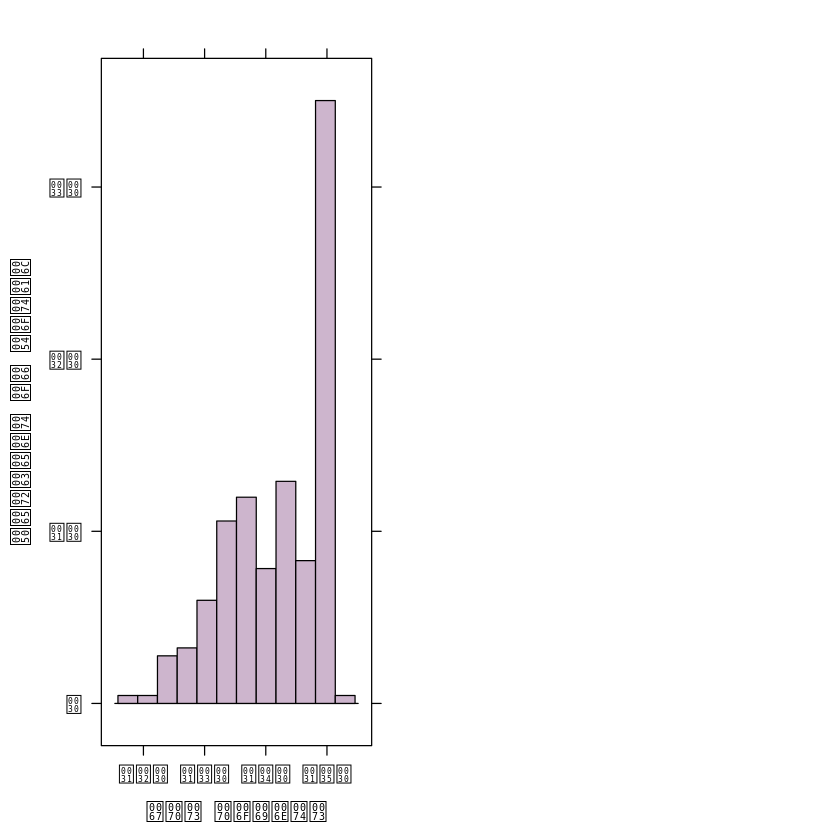

In [4]:
require("lattice")

#load data
buck_DEM = read.csv('/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RADAR_MAP/PRACTICE_INTERP/buck_DEM.csv' ,header=T)
buck_gps = read.csv('/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RADAR_MAP/PRACTICE_INTERP/buck_allpoints.csv',header=T)

h1 = histogram(~ h_gps, buck_gps, xlab="gps points", col="thistle3", nint=12)
print(h1, split =c(1,1,2,1), more=T)
rm(h1)

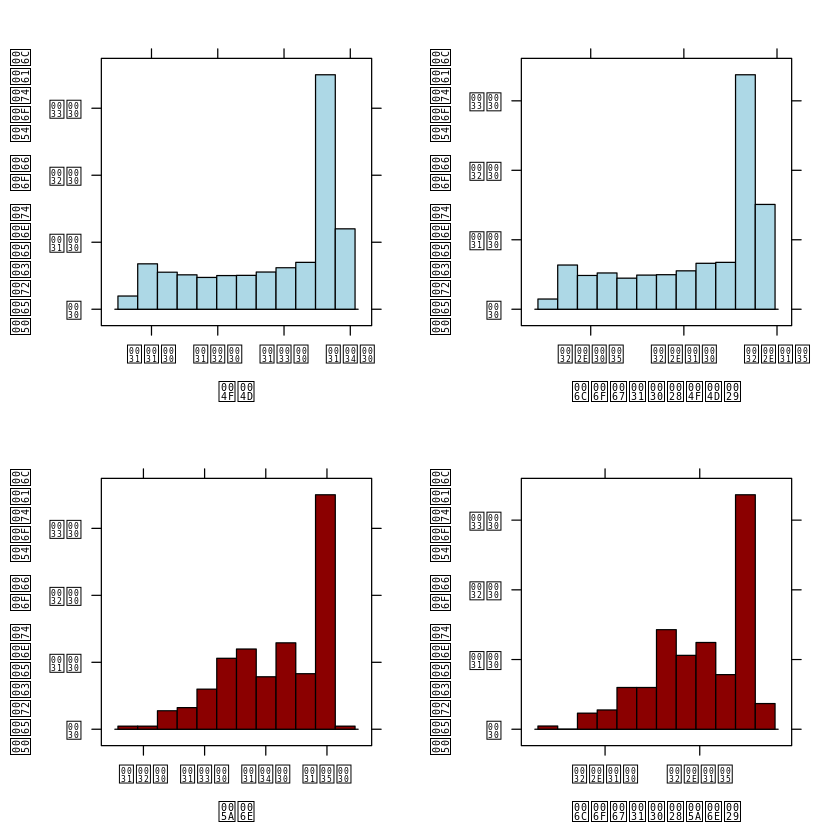

In [5]:
#display stuff
h1 <-histogram(~ h_DEM, buck_DEM, xlab="OM", col="lightblue", nint=12)
h2 <-histogram(~ h_gps , buck_gps, xlab="Zn", col="red4", nint=12)
h3 <-histogram(~log10(h_DEM), buck_DEM, xlab="log10(OM)", col="lightblue", nint=12)
h4 <-histogram(~log10(h_gps) , buck_gps, xlab="log10(Zn)", col="red4", nint=12)
print(h1, split =c(1,1,2,2), more=T)
print(h3, split =c(2,1,2,2), more=T)
print(h2, split =c(1,2,2,2), more=T)
print(h4, split =c(2,2,2,2), more=F)
rm(h1, h2, h3, h4)

In [7]:
#Modelling the covariable
xyplot(lth_gps ~ lth_DEM,  data=buck_gps.h_gps@data, pch=20, cex=1.2,col="blue", ylab="log10(h_gps)", xlab="log10(h_DEM)")
with(buck_gps.h_gps@data,cor(lth_gps, lth_DEM))

ERROR: Error in eval(substitute(groups), data, environment(x)): object 'buck_gps.h_gps' not found


In [6]:
sum(is.na(buck_gps.h_gps$h_DEM))

with(buck_gps.h_gps@data,cor(lth_DEM, lth_GPS, use = "complete"))

ERROR: Error in eval(substitute(groups), data, environment(x)): object 'buck_gps.h_gps' not found


In [ ]:
#model the omnidirectional spatal variogram
# all valid covariable observations, with coordinates
meuse.co <-subset(as.data.frame(meuse), !is.na(om),c(x, y, om))
# add log10-transformed variables for convenience
meuse.co <-cbind(meuse.co, ltom =log10(meuse.co$om))
str(meuse.co)

In [ ]:
# convert to spatial object
coordinates(meuse.co) <- ~ x + y
# experimental variogram
v.ltom <-variogram(ltom ~ 1, meuse.co, cutoff=1800)
plot(v.ltom, pl=T)
# model by eye
m.ltom <-vgm(.035, "Sph", 800, .015)
# fit(m.ltom.f <-fit.variogram(v.ltom, m.ltom))

In [ ]:
plot(v.ltom, pl=T, model=m.ltom.f)
# compare variogram structure to target variable
m.ltom.f$range[2]; m.ltpb.f$range[2].
round(m.ltom.f$psill[1]/sum(m.ltom.f$psill),2)
round(m.ltpb.f$psill[1]/sum(m.ltpb.f$psill),2)

#Building a data structure to model co-regionalisation

(g <-gstat(NULL, id = "ltpb", form = ltpb ~ 1, data=meuse.pb))

(g <-gstat(g, id = "ltom", form = ltom ~ 1, data=meuse.co))

v.cross <-variogram(g)
str(v.cross)

plot(v.cross, pl=T)


In [ ]:

# Fitting a linear model of co-regionalisation
(g <-gstat(g, id = "ltpb", model = m.ltpb.f, fill.all=T))


(g <-fit.lmc(v.cross, g, fit.method=6, correct.diagonal=1.01))

plot(variogram(g), model=g$model)

# Comparing models of regionalisation and co-regionalisation
str(m.ltom.f)
str(g$data$ltpb, max.level = 1)
str(g$model$ltpb, max.level = 1)


g$model$ltom$psill - m.ltom.f$psill

sum(g$model$ltom$psill) -sum(m.ltom.f$psill)

sum(g$model$ltom$psill)

g$model$ltpb$psill - m.ltpb.f$psill

sum(g$model$ltpb$psill) -sum(m.ltpb.f$psill)

sum(g$model$ltpb$psill)

# Co-kriging with one co-variable

# interpolate
k.c <-predict(g, meuse.grid)

str(k.c)

# summarize predictions and their errors
summary(k.c$ltpb.pred);summary(k.c$ltpb.var)

# predict at the extra points
k <-predict(g, meuse.extra)

# compute and summarize prediction errors
diff <- k$ltpb.pred - meuse.extra$ltpb
summary(diff)

sqrt(sum(diff^2)/length(diff))

sum(diff)/length(diff)

diff <-as.data.frame(diff)
coordinates(diff) <-coordinates(meuse.extra)
bubble(diff, zcol="diff", pch=1,main="CK evaluation errors at undersampled points, log10(Pb)")
